In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# insurance 데이터셋 불러오기
df = pd.read_csv('insurance.csv')

# 데이터 탐색(EDA)

In [5]:
# insurance 데이터셋 정보 확인

df.info()
 # 1338개 행과 7개의 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# 데이터셋 5개 행 확인
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# 데이터 결측치 확인

df.isnull().sum()
# 준비한 데이터셋의 결측치가 없기 때문에 결측치 처리 실습은 생략할게용^^

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 컬럼별 분포 시각화

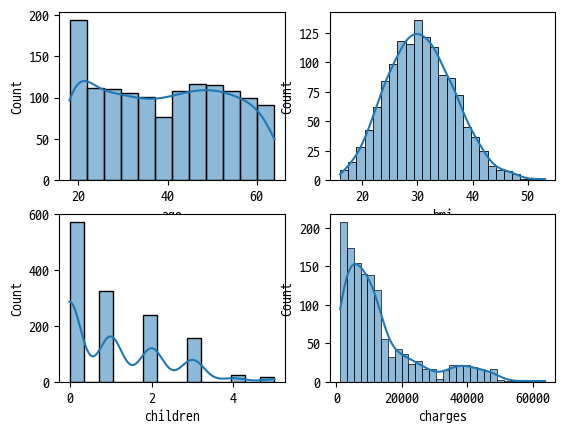

In [18]:
# 수치형 변수 분포 확인
# 서브플롯을 사용하여 히스토그램 시각화

fig,ax = plt.subplots(2,2)

sns.histplot(df['age'],ax=ax[0,0], kde=True)
sns.histplot(df['bmi'],ax=ax[0,1], kde=True)
sns.histplot(df['children'],ax=ax[1,0], kde=True)
sns.histplot(df['charges'],ax=ax[1,1], kde=True)
plt.show()



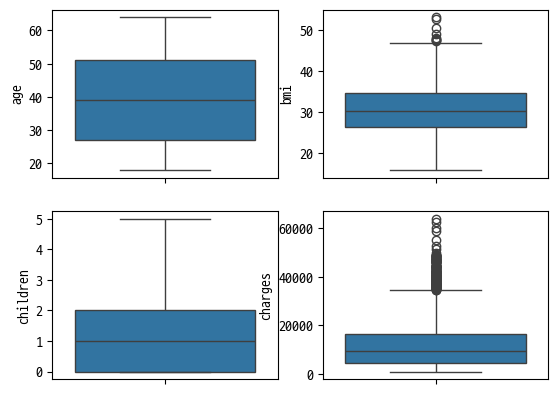

In [19]:
# 수치형 변수 이상치 확인
# 박스플롯을 사용하여 시각화


fig,ax = plt.subplots(2,2)

sns.boxplot(df['age'],ax=ax[0,0])
sns.boxplot(df['bmi'],ax=ax[0,1])
sns.boxplot(df['children'],ax=ax[1,0])
sns.boxplot(df['charges'],ax=ax[1,1])
plt.show()


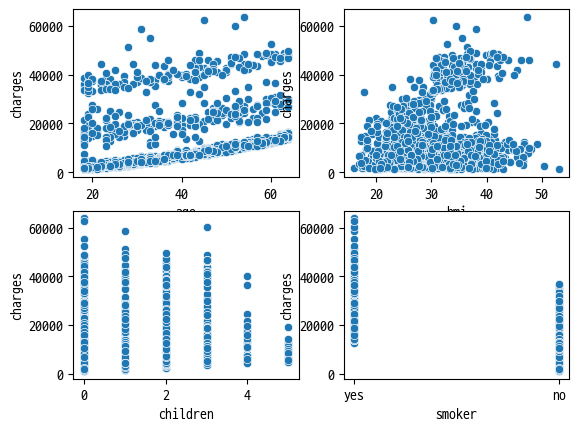

In [20]:
# 보험료(charges)와 수치형 변수 간의 관계 시각화
# 산점도를 사용하여 시각화

fig,ax = plt.subplots(2,2)
sns.scatterplot(x='age', y='charges', data=df, ax=ax[0,0])
sns.scatterplot(x='bmi', y='charges', data=df, ax=ax[0,1])
sns.scatterplot(x='children', y='charges', data=df, ax=ax[1,0])
sns.scatterplot(x='smoker', y='charges', data=df, ax=ax[1,1])
plt.show()


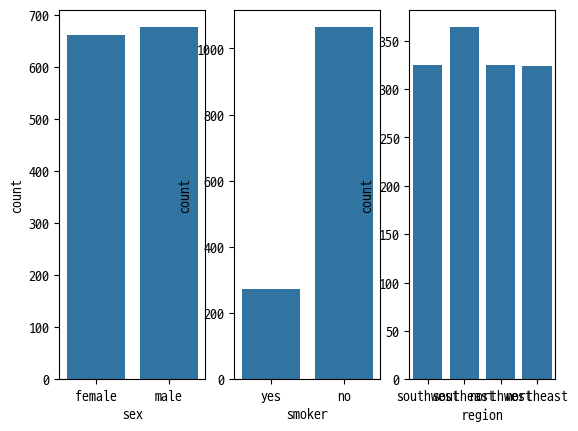

In [22]:
# 범주형 변수 분포 확인 (sex, smoker, region)
# 카운트플롯을 사용하여 시각화

fig,ax = plt.subplots(1,3)
sns.countplot(x='sex', data=df, ax=ax[0])
sns.countplot(x='smoker', data=df, ax=ax[1])
sns.countplot(x='region', data=df, ax=ax[2])
plt.show()


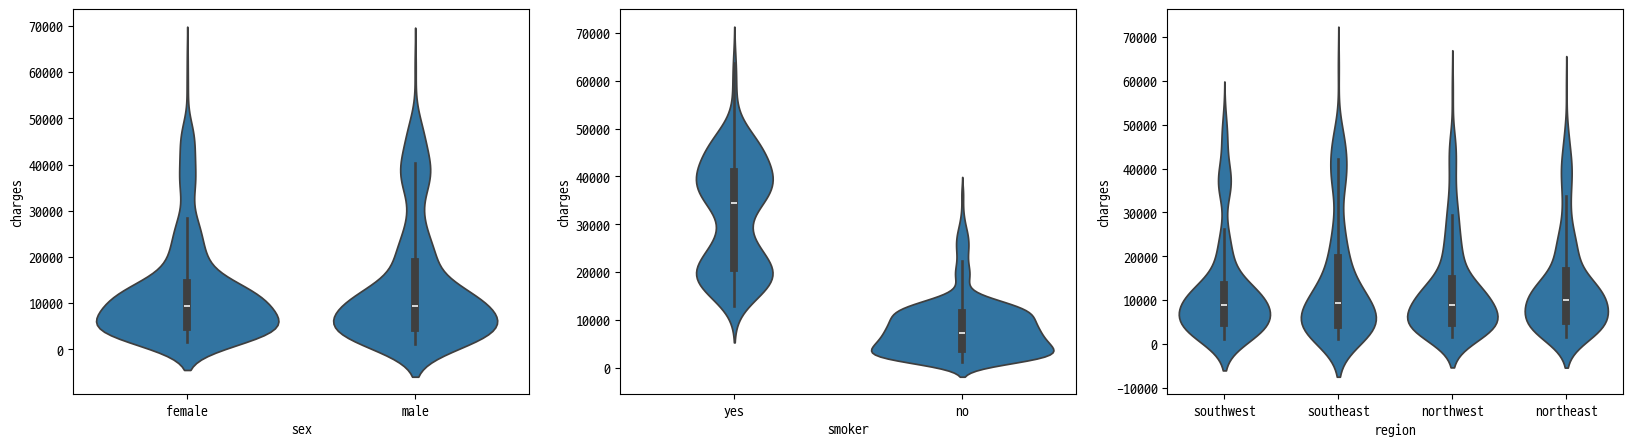

In [23]:
# 보험료(charges)와 범주형 변수 간의 관계 시각화
# 바이올린 플롯을 사용하여 시각화

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.violinplot(data=df, x='sex', y='charges', ax=axes[0])
sns.violinplot(data=df, x='smoker', y='charges', ax=axes[1])
sns.violinplot(data=df, x='region', y='charges', ax=axes[2])
plt.show()


# 데이터 전처리


In [4]:
# 범주형 변수 전처리
from sklearn.preprocessing import LabelEncoder

# sex, smoker는 이진 클래스 변수이기 때문에 one-hot 인코딩

# df['sex'] = df['sex'].map({'female': 0, 'male': 1})
# df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# region은 다중 클래스 변수이기 때문에 label 인코딩
# LabelEncoder의 fit_transform 메서드를 사용하여 region을 숫자로 변환 

df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])
df['region'] = LabelEncoder().fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [27]:
# 수치형 변수 전처리
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 수치형 변수 구분
num_cols = ['age', 'bmi', 'children']

# 수치형 변수 스케일링
# StandardScaler의 fit_transform 메서드를 사용하여 수치형 변수를 표준화

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520


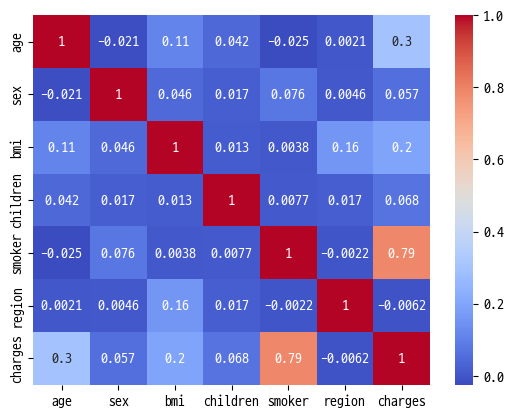

In [28]:
# 상관관계 히트맵
# 삼각형으로 상관관계 히트맵을 시각화

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [30]:
# 독립 변수(X)와 종속 변수(y) 구분
X = df.drop('charges', axis=1)
y = df['charges']


# 학습 / 테스트 데이터 세트 나누기

In [31]:
from sklearn.model_selection import train_test_split
# train_test_split을 통해 학습 데이터와 검증 데이터를 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape


((1070, 6), (268, 6), (1070,), (268,))

In [32]:
X_train

,age,sex,bmi,children,smoker,region
560,0.483668,0,-1.757474,0.751079,0,1
1285,0.554869,0,-1.040599,-0.908614,0,0
1142,0.910875,0,-0.952015,-0.908614,0,2
969,-0.014740,0,0.599846,3.240619,0,2
486,1.053277,0,-1.508126,1.580926,0,1
...,...,...,...,...,...,...
1095,-1.509965,0,0.112633,2.410772,0,0
1130,-0.014740,0,-1.114419,3.240619,0,2
1294,1.338082,1,-0.900341,-0.908614,0,0
860,-0.157143,0,2.778356,0.751079,1,3


In [33]:
X_val

,age,sex,bmi,children,smoker,region
764,0.412467,0,-0.900341,0.751079,0,0
887,-0.228344,0,-0.105546,-0.908614,0,1
890,1.765289,0,-0.619825,-0.908614,1,1
1293,0.483668,1,-0.806836,1.580926,0,1
259,-1.438764,1,0.206139,-0.908614,1,1
...,...,...,...,...,...,...
109,1.694088,1,0.726160,-0.908614,1,2
575,1.338082,0,-0.573072,-0.908614,0,1
535,-0.085942,1,-0.432814,-0.078767,0,0
543,1.053277,0,2.747188,-0.908614,1,2


In [34]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [35]:
y_val

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

# 모델 선정하고 Fit 해보기

### 선형 회귀 모델

In [37]:
# 선형 회귀 모델 학습
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 학습
lr.fit(X_train, y_train)

# 검증 데이터로 예측
y_val_pred_lr = lr.predict(X_val)

# 예측 결과 확인
# print("Validation Predictions:", y_val_pred_lr)

# 모델 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Validation MSE:", mean_squared_error(y_val, y_val_pred_lr))
print("Validation MAE:", mean_absolute_error(y_val, y_val_pred_lr))
print("Validation R2:", r2_score(y_val, y_val_pred_lr))


Validation MSE: 33635210.43117841
Validation MAE: 4186.508898366433
Validation R2: 0.7833463107364538


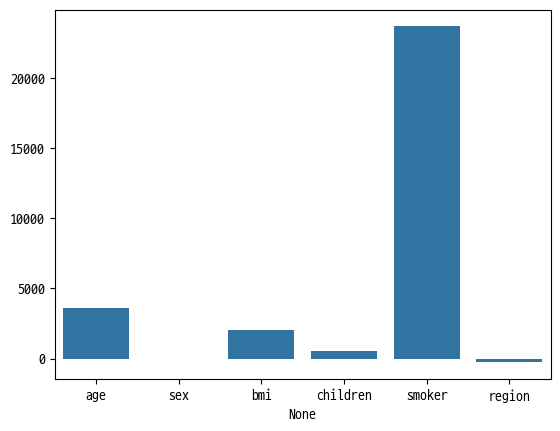

In [42]:
# 선형 회귀 모델의 변수 중요도 확인
features = X.columns
coefficients = lr.coef_

# 시각화
sns.barplot(x=features, y=coefficients)
plt.show()

### KNN 회귀 모델

In [43]:
# NKK 회귀 모델
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

# 모델 학습
knn.fit(X_train, y_train)

# 검증 데이터로 예측
y_val_pred_knn = knn.predict(X_val)

# 예측 결과 확인
#print("Validation Predictions:", y_val_pred_knn)

# 모델 성능 평가

print("Validation MSE:", mean_squared_error(y_val, y_val_pred_lr))
rmse_lr = np.sqrt(mean_squared_error(y_val, y_val_pred_lr))
print("Validation RMSE:", rmse_lr)
print("Validation MAE:", mean_absolute_error(y_val, y_val_pred_lr))
print("Validation R2:", r2_score(y_val, y_val_pred_lr))


Validation MSE: 33635210.43117841
Validation RMSE: 5799.587091438356
Validation MAE: 4186.508898366433
Validation R2: 0.7833463107364538


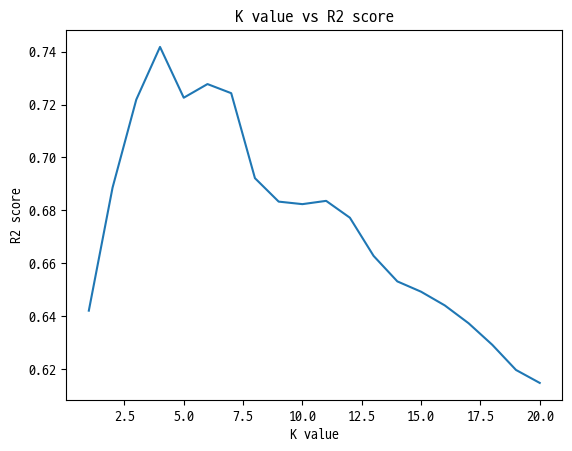

In [44]:
# K 값에 따른 R2 score 시각화
k_values = range(1, 21)
r2_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred_knn = knn.predict(X_val)
    r2_scores.append(r2_score(y_val, y_val_pred_knn))

plt.plot(k_values, r2_scores)
plt.xlabel('K value')
plt.ylabel('R2 score')
plt.title('K value vs R2 score')
plt.show()

### 랜덤포레스트 회귀 모델

In [46]:
# 랜덤 포레스트 회귀 모델
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 학습하기
rf.fit(X_train, y_train)

# 검증 데이터로 예측
y_val_pred_rf = rf.predict(X_val)

# 예측 결과 확인
# print("Validation Predictions (Random Forest):", y_val_pred_rf)

# 모델 성능 평가
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
print("MSE (Random Forest):", mse_rf)

# R2 score 계산
r2_rf = r2_score(y_val, y_val_pred_rf)
print("R2 Score (Random Forest):", r2_rf)

# RMSE 계산
rmse_rf = np.sqrt(mse_rf)
print("RMSE (Random Forest):", rmse_rf)

# MAE 계산
mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
print("MAE (Random Forest):", mae_rf)



MSE (Random Forest): 20828606.169886414
R2 Score (Random Forest): 0.8658371893300133
RMSE (Random Forest): 4563.836781687795
MAE (Random Forest): 2515.8954735548823


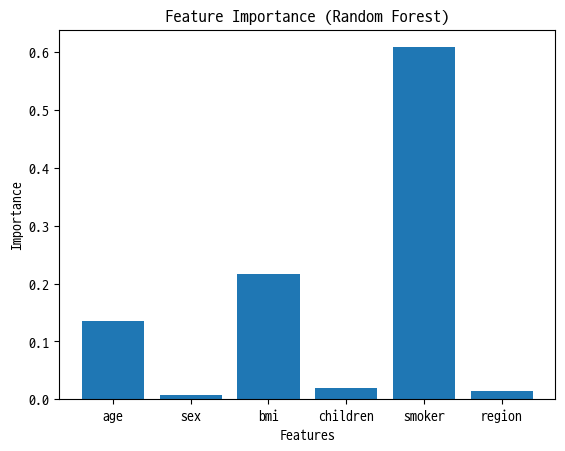

In [ ]:
# 랜덤포레스트 회귀 모델의 변수 중요도 확인
features = X.columns
coefficients = rf.feature_importances_

# 시각화
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


# 고생하셨습니다~